# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I have chosen the No Show Appointments dataset for my investigation.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
-ScheduledDay tells us on what day the patient set up their appointment.
-Neighborhood indicates the location of the hospital.
-Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
‘Bolsa Família’ is a social welfare program of the Government of Brazil. It provides financial aid to poor Brazilian families
-Age tells us how old is the patient.
-Hipertension, a medical condition, True or False.
-Diabetes, a medical condition,True or False.
-Alcoholism shows addiction to the consumption of alcoholic using True or False.
-Handcap, tells if patient is handicap or not using True or False.
-SMS_received = 1 or more messages sent to the patient.
-No-show = ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.




### Question(s) for Analysis
>- What is the ratio of the people who attended versus the people who missed ?
- What is the most common disease among patients who go for appointments ?
- Does the Bolsa Familia scholarship affect the appointment show rate ?
- Is it more likely for people who recieved SMS to show up ?
- What are the most popular and unpopular neighbourhoods ?




In [3]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install numpy==1.16.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime as dt

% matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()

Saving noshowappointments-kagglev2-may-2016.csv to noshowappointments-kagglev2-may-2016.csv


This allowed me to be able to upload the csv file into google colab notebook

<a id='wrangling'></a>
## Data Wrangling

In [48]:
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [49]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
df_noshow.shape

(110527, 14)

In [7]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [29]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age has a minumim value of -1. This cannot possibly be correct

In [30]:
#sum of each column that have null values
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [31]:
#sum of values in data that are duplicated
df_noshow.duplicated().sum() 

0

The Dataset has no duplicated values and no null values

In [32]:
df_noshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The dataset looks okay but for a few corrections and cleaning that need to be made which would be done in the next section

### Data Cleaning
- Format column names to lowercase
- Drop feautures that are not needed for the analysis like Patient ID and Appointment ID
- Change column names to correct format such as 'hipertension' to 'hypertension' and 'handcap' to 'handicap'
- Handicap has more than 2 unique values which needs to be corrected
- Change no show column to showed_up and change the format to be more useful
- Format datetime and extract the datetime from the timestamp
- Remove rows with wrong values. e.g age has value of less than 0 which isnt possible


Format Column Names to Lower case

In [50]:
#Format column names to lowercase
df_noshow.columns = df_noshow.columns.str.lower()

Formating the column names to lowercase helps to be able to work on any column easier without having to remember if it started with a uppercase or ended with a lowercase letter. Every column has been
 formatted into lowercase

In [51]:
#Confirm Change
df_noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
#Drop Features that are not necessary
df_noshow.drop(['patientid', 'appointmentid','scheduledday', 'appointmentday' ], axis = 1, inplace=True)

Those columns were dropped because it was not neccesary in the conclusions i am trying to infer from the data

In [53]:
#Confirm Change
df_noshow.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [54]:
#Change Column names to correct format
df_noshow.rename(columns = {'hipertension':'hypertension', 'handcap' : 'handicap', 'no-show':'showed_up'}, inplace=True)

The columns renamed were spellt incorrectly and the cell above changes them to the right spelling. 
The no-show column was also changed to showed_up to avoid confusion. Originally, in the no-show column, 'no' means the patient showed up and 'yes' means the patient did not show up but since the column has been renamed to showed_up, it only makes sense if 'yes' indicates they did show up and 'no' indicates they did not. 

But since the dataset showed_up with a 'No' value means they did show up, and 'yes' means they did not show up, i will assign 1 to 'No' and O to 'Yes' in the next cell



In [55]:
#Change "yes" to 0 and 'No' to 1
df_noshow['showed_up'] = df_noshow['showed_up'].apply(lambda x : 1 if x == 'No' else 0)

In [56]:
#Check change
df_noshow.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [57]:
#Checking the counts of handicap so it can be formatted back to just 1 and 0
df_noshow['handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

The value counts for the handicap feature which is meant to just be 0 and 1 has values greater than 1.
To fix this we get the value counts of the handicap feature and convert any value greater than 1 to exactly 1.

In [58]:
# Replace values after 1 with 1 
df_noshow['handicap'].replace(2 ,1 ,inplace=True)
df_noshow['handicap'].replace(3 ,1 ,inplace=True)
df_noshow['handicap'].replace(4 ,1 ,inplace=True)

Now that the handicap values greater than 1 has been succesfully coverted back to 0 and 1, lets check to confirm our changes

In [59]:
#Confirm changes
df_noshow.nunique()

gender             2
age              104
neighbourhood     81
scholarship        2
hypertension       2
diabetes           2
alcoholism         2
handicap           2
sms_received       2
showed_up          2
dtype: int64

The data looks cleaner now

One more thing needs to be done. We can recall from the description earlier that age column had a minimum value of -1 which is impossible so we would correct that now

In [60]:
# drop all rows with ' age = -1' as this is impossible
df_noshow.drop(df_noshow.query('age == -1').index, inplace = True)

#confirm that there are no more rows with age value at -1
df_noshow.query('age == -1')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up


In [61]:
df_noshow.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The minimum age has been corrected back to 0 

Now Lets check the dataset to be sure if dataset is really clean and ready for the next step

In [45]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         110526 non-null  object
 1   age            110526 non-null  int64 
 2   neighbourhood  110526 non-null  object
 3   scholarship    110526 non-null  int64 
 4   hypertension   110526 non-null  int64 
 5   diabetes       110526 non-null  int64 
 6   alcoholism     110526 non-null  int64 
 7   handicap       110526 non-null  int64 
 8   sms_received   110526 non-null  int64 
 9   showed_up      110526 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 13.3+ MB


This shows that every feature is accounted for and is matched with the proper data type. Its time for the next step which is exploratory analysis

<a id='eda'></a>
## Exploratory Data Analysis
Now that data is cleaned, we are ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that posed in the Introduction section.

### Research Question 1 : What is the percentage of people who show up for appointments compared to those who do not ?

In [87]:
#Create variables to show who came and who didnt and calculate their mean
showed = (df_noshow.showed_up == True).mean() * 100
missed = (df_noshow.showed_up == False).mean() * 100


I have created new variables called showed and missed to separate the mean of people who came and the mean of people who missed the appointment and we would use a bar chart to plot this ratio

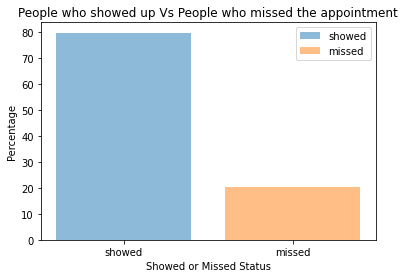

In [91]:
plt.bar(0, showed, alpha=0.5,label='showed' )
plt.bar(1, missed, alpha=0.5,label = 'missed')

plt.title("People who showed up Vs People who missed the appointment")
plt.xticks([0,1], ['showed', 'missed'])
plt.xlabel('Showed or Missed Status')
plt.ylabel('Percentage')
plt.legend();

According to the chart, about 80% of the patients showed up for the appointment while 20% missed it

##Question 2 : What is the most common disease among patients who go for appointments ?

First we find the mean or proportion  of each medical condition in the dataset

In [99]:
hyper = round(df_noshow.hypertension.mean()*100)
hyper

20

There are 20% of patients who have hypertension in the dataset.

Next, Diabetes

In [100]:
diabetic= round(df_noshow.diabetes.mean()*100)
diabetic

7

There are 7% of diabetic patients in the dataset, 
Next, Alcoholism

In [101]:
alcohol = round(df_noshow.alcoholism.mean() * 100)
alcohol

3

There are 3% of patients with alcoholism.
Next, handicap

In [103]:
handicp = round(df_noshow.handicap.mean()*100)
handicp

2

There are 2% of handicapped patients in the dataset
Next we plot the bar chart

Text(0, 0.5, 'Incidence Percentage')

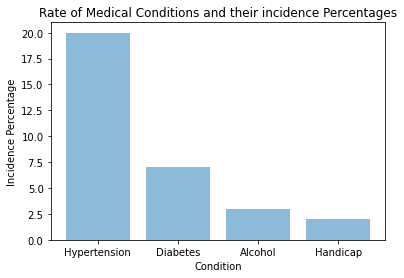

In [106]:
locations = [1,2,3,4]
heights = [hyper, diabetic, alcohol, handicp]
labels = ['Hypertension', 'Diabetes', 'Alcohol', 'Handicap']
plt.bar(locations, heights, alpha = 0.5)
plt.xticks(locations, labels)
plt.title('Rate of Medical Conditions and their incidence Percentages')
plt.xlabel('Condition')
plt.ylabel('Incidence Percentage')

Out of everyone going for appointments, Patients with hypertension seems to be the most common disease with 20%

##Question 3 : Does the Bolsa Familia scholarship affect the appointment show rate ?

In [108]:
#counts of patients with the scholarship and people without it
df_noshow.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [114]:
no_scholarship = (df_noshow.scholarship.value_counts()[0]/df_noshow.shape[0]) *100
no_scholarship

90.17335287624631

In [116]:
yes_scholarship = (df_noshow.scholarship.value_counts()[1]/df_noshow.shape[0])*100
yes_scholarship

9.826647123753688

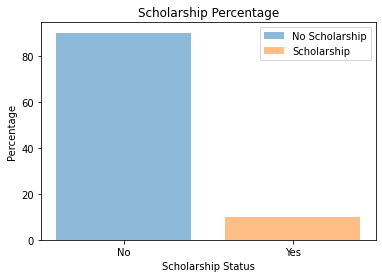

In [118]:
plt.bar(0, no_scholarship, alpha=0.5, label = 'No Scholarship')
plt.bar(1, yes_scholarship, alpha = 0.5, label = 'Scholarship')

plt.title("Scholarship Percentage")
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Scholarship Status')
plt.ylabel('Percentage')
plt.legend();

Only 9.8% have the scholarship while 90.2% do not have the scholarship.

Now we will group the people with and without the scholarship with the people who showed and missed the appointment and then plot a chart to visualize if it has any effect on people showing up for appointments or not

In [123]:
scholar = (df_noshow.groupby('scholarship')['showed_up'].mean()) *100
scholar

scholarship
0    80.192645
1    76.263696
Name: showed_up, dtype: float64

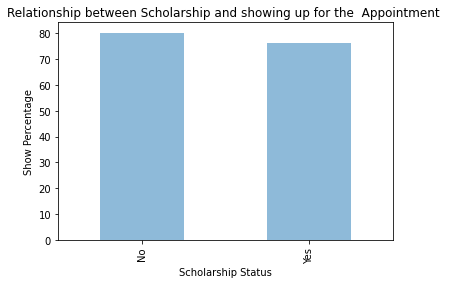

In [125]:
scholar.plot(kind='bar', title = 'Relationship between Scholarship and showing up for the  Appointment ', alpha=0.5,)
plt.xlabel('Scholarship Status')
plt.ylabel('Show Percentage')
plt.xticks([0,1], ['No', 'Yes']);


It looks like people without scholarship are more likely to show up for an appointment as they have a show percentage of 80% while people with scholarship have a show percentage of 72%

##Question 4 : Is it more likely for people who recieved SMS to show up ?

In [126]:
#Get count for sms recieved
df_noshow.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

People who did not recieve sms are more than those who did.Lets get the proportion in percentage 

In [131]:
#Proportion of those who recieved sms
yes_sms = (df_noshow.sms_received.value_counts()[0]/df_noshow.shape[0]) * 100
yes_sms

67.89714637279916

In [132]:
#Proportion of those who did not recieve sms
no_sms = (df_noshow.sms_received.value_counts()[1]/df_noshow.shape[0])*100
no_sms

32.10285362720084

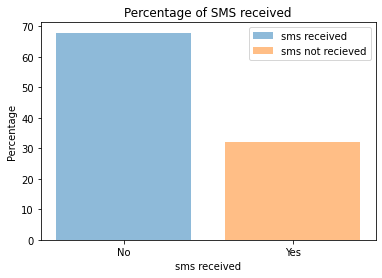

In [136]:
#Plot chart for sms received vs not received
plt.bar(0, yes_sms, alpha=0.5,label='sms received')
plt.bar(1, no_sms, alpha=0.5, label='sms not recieved')

plt.xticks([0,1],['No', 'Yes'])
plt.title('Percentage of SMS received')
plt.xlabel('sms received')
plt.ylabel('Percentage')
plt.legend();


According to the chart only about 32% of people recieved the sms texts. Now lets see if the texts had any effect on those who showed up for the appointment

In [139]:
#group sms recieved with showed up
sms_show= (df_noshow.groupby('sms_received').showed_up.mean()) * 100
sms_show

sms_received
0    83.296466
1    72.425455
Name: showed_up, dtype: float64

Text(0, 0.5, 'Show Percentage')

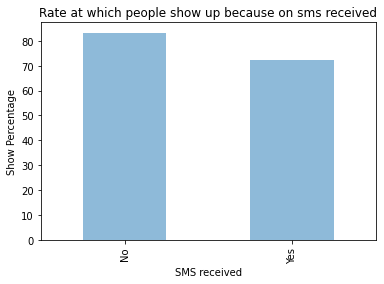

In [142]:
sms_show.plot(kind='bar', title='Rate at which people show up because on sms received', alpha=0.5)
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('SMS received')
plt.ylabel('Show Percentage')

It turnes out people who did not get an sms are more likely to show up for an appointment as they have a show percentage of 83% while those who received the sms have a show percentage of 72% 

## Question 5 : What are the top 10 popular and unpopular neighbourhoods ?

In [174]:
#Getting the value counts of 10 most popular neighbourhoods
hoods = df_noshow.groupby('neighbourhood')['showed_up'].mean().sort_values(ascending=False)[:10]
hoods

neighbourhood
PARQUE INDUSTRIAL    1.000000
ILHA DO BOI          0.914286
AEROPORTO            0.875000
MÁRIO CYPRESTE       0.854447
SOLON BORGES         0.852878
DE LOURDES           0.845902
DO CABRAL            0.842857
SANTA MARTHA         0.841584
JARDIM DA PENHA      0.837245
DO QUADRO            0.835100
Name: showed_up, dtype: float64

In [172]:
#Getting count of 10 least popular neighborhoods
hoods1 = df_noshow.groupby('neighbourhood')['showed_up'].mean().sort_values(ascending=True)[:10]
hoods1

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    0.000000
SANTOS DUMONT                  0.710815
SANTA CECÍLIA                  0.725446
SANTA CLARA                    0.735178
ITARARÉ                        0.737336
JESUS DE NAZARETH              0.756046
HORTO                          0.760000
ILHA DO PRÍNCIPE               0.765225
CARATOÍRA                      0.769591
ANDORINHAS                     0.769673
Name: showed_up, dtype: float64

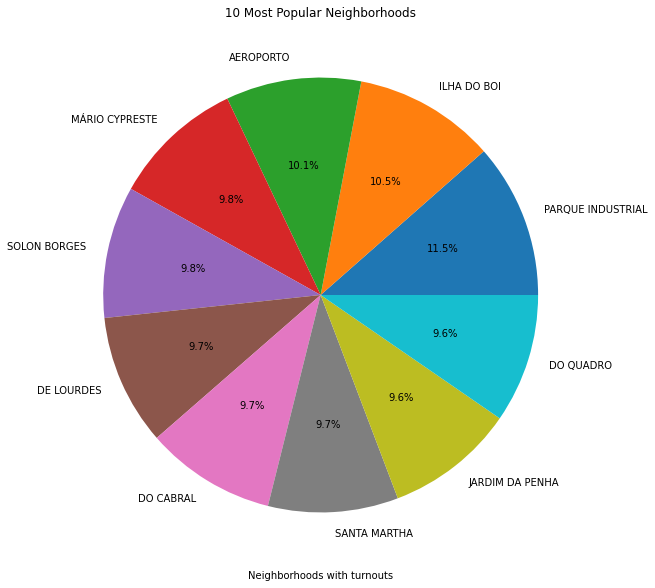

In [170]:
hoods.plot(kind='pie', figsize=(10,10), title=' 10 Most Popular Neighborhoods ', autopct='%1.1f%%')
plt.xlabel("Neighborhoods with turnouts")
plt.ylabel('');

This represents about 10 neighborhoods with more turnouts, i.e people usually show up for their appointments in these neighborhoods.

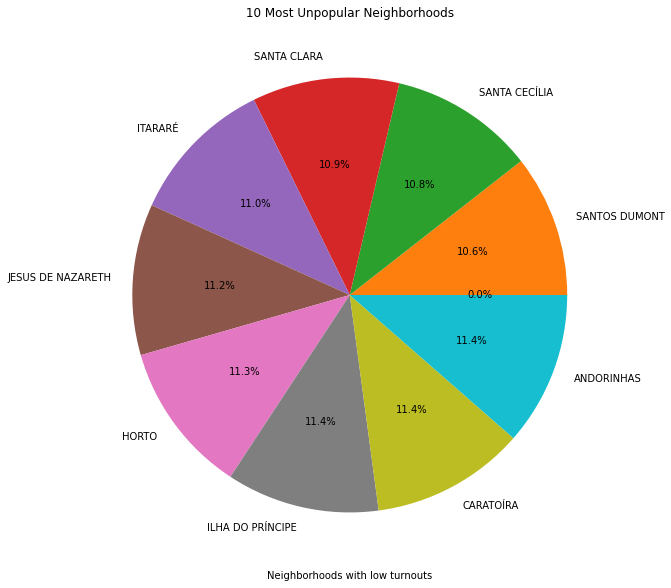

In [173]:
hoods1.plot(kind='pie', figsize=(10,10), title=' 10 Most Unpopular Neighborhoods ', autopct='%1.1f%%')
plt.xlabel("Neighborhoods with low turnouts")
plt.ylabel('');

<a id='conclusions'></a>
# Conclusions

1. Majority of people go for their appointments (80% to be exact)
2. People with hypertension and diabetes are associated with a high show up rate
3. 9% have Bolsa Family scholarship. and people with no scholarship have higher show-up rate to appointments
4. Sms texts dont seem to have any effect on the show up rate
5. PARQUE INDUSTRIAL, ILHA DO BOI and AEROPORTO are the neighborhoods with the highest show-up rate to appointments
6. SANTA CECÍLIA, SANTOS DUMONT and ILHAS OCEÂNICAS DE TRINDADE are the neighborhoods with lowest show-up rate to appointments.

##Limitations
1. There was no information on the appointment hour, only date. The appointment hour would probably have had a strong correlation with people showing up.